In [1]:
from datasets import load_dataset, DownloadMode

# First, download the dataset with caching
def download_starcoderdata_cpp(save_directory, split="train", download_mode=DownloadMode.REUSE_DATASET_IF_EXISTS):
    try:
        ds = load_dataset(
            "bigcode/starcoderdata",
            data_dir="cpp",
            split=split,
            cache_dir=save_directory,
            download_mode=download_mode,
        )

        # Save the dataset properly for later reloading
        output_path = f"{save_directory}/cpp_{split}_dataset"
        ds.save_to_disk(output_path)

        print(f"Dataset 'bigcode/starcoderdata' (C++, {split}) successfully downloaded and saved to '{output_path}'.")
        return ds

    except Exception as e:
        print(f"Error downloading dataset 'bigcode/starcoderdata' (C++, {split}): {e}")
        return None

In [2]:
ds = download_starcoderdata_cpp(save_directory="./", split="train")

Resolving data files:   0%|          | 0/48 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Loading dataset shards:   0%|          | 0/99 [00:00<?, ?it/s]

Saving the dataset (0/100 shards):   0%|          | 0/6353527 [00:00<?, ? examples/s]

Dataset 'bigcode/starcoderdata' (C++, train) successfully downloaded and saved to './/cpp_train_dataset'.


In [3]:
from datasets import load_from_disk

# Later, load the dataset from the saved location
dataset = load_from_disk("./cpp_train_dataset")

Loading dataset from disk:   0%|          | 0/100 [00:00<?, ?it/s]

In [4]:
dataset

Dataset({
    features: ['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id', 'content'],
    num_rows: 6353527
})

In [5]:
type(dataset)

datasets.arrow_dataset.Dataset

In [6]:
print(dataset[0])

{'max_stars_repo_path': 'button_events_game.cpp', 'max_stars_repo_name': 'darkoppressor/cosmic-runner', 'max_stars_count': 0.0, 'id': '0', 'content': '/* Copyright (c) 2012 Cheese and Bacon Games, LLC */\n/* This file is licensed under the MIT License. */\n/* See the file docs/LICENSE.txt for the full license text. */\n\n#include "game.h"\n#include "android_leaderboard.h"\n\n#include <button_events.h>\n#include <window_manager.h>\n#include <game_manager.h>\n#include <android.h>\n#include <gui_manager.h>\n\n#include <boost/algorithm/string.hpp>\n\nusing namespace std;\n\nbool Button_Events::handle_button_event_game (string button_event, Window* parent_window, bool& window_opened_on_top) {\n    if (button_event == "game_over") {\n        Window_Manager::close_all_windows();\n\n        if (Game::is_score_high()) {\n            Window_Manager::get_window("input_name")->toggle_on();\n\n            GUI_Manager::confirm_gui_object();\n        } else {\n            Android_Leaderboard::submit_

In [7]:
dataset = dataset.sort(column_names=["max_stars_count", "max_stars_repo_name"], reverse=[True, False])

In [8]:
# Print the first 10 examples
for i, example in enumerate(dataset):
    if i < 10:
        print(f"Example {i}:")
        print(example['content'])
        print("\n")
    else:
        break

Example 0:
/**
 * Copyright (c) Facebook, Inc. and its affiliates.
 *
 * This source code is licensed under the MIT license found in the
 * LICENSE file in the root directory of this source tree.
 */

#include "thread-local.h"

#ifdef __linux__
#include <link.h>
#include <asm/prctl.h>
#include <sys/prctl.h>
extern "C" {
extern int arch_prctl(int, unsigned long*);
}
#endif //__linux__

namespace HPHP {

#ifdef USE_GCC_FAST_TLS

void ThreadLocalManager::OnThreadExit(void* p) {
  auto list = getList(p);
  p = list->head;
  delete list;
  while (p != nullptr) {
    auto* pNode = static_cast<ThreadLocalNode<void>*>(p);
    if (pNode->m_on_thread_exit_fn) {
      pNode->m_on_thread_exit_fn(p);
    }
    p = pNode->m_next;
  }
}

void ThreadLocalManager::PushTop(void* nodePtr, size_t nodeSize) {
  auto& node = *static_cast<ThreadLocalNode<void>*>(nodePtr);
  auto key = GetManager().m_key;
  auto list = getList(pthread_getspecific(key));
  if (UNLIKELY(!list)) {
    ThreadLocalSetValue(key, li

In [9]:
from datasets import Dataset

def calculate_avg_line_length(example):
    lines = example['content'].split('\n')
    avg_length = sum(len(line) for line in lines) / len(lines)
    example['avg_line_length'] = avg_length
    return example

dataset = dataset.map(calculate_avg_line_length)

for i, example in enumerate(dataset):
    if i < 10:
        print(f"Example {i}:")
        print(example['content'])
        print(f"Average Line Length: {example['avg_line_length']}\n")
    else:
        break

Map:   0%|          | 0/6353527 [00:00<?, ? examples/s]

Example 0:
/**
 * Copyright (c) Facebook, Inc. and its affiliates.
 *
 * This source code is licensed under the MIT license found in the
 * LICENSE file in the root directory of this source tree.
 */

#include "thread-local.h"

#ifdef __linux__
#include <link.h>
#include <asm/prctl.h>
#include <sys/prctl.h>
extern "C" {
extern int arch_prctl(int, unsigned long*);
}
#endif //__linux__

namespace HPHP {

#ifdef USE_GCC_FAST_TLS

void ThreadLocalManager::OnThreadExit(void* p) {
  auto list = getList(p);
  p = list->head;
  delete list;
  while (p != nullptr) {
    auto* pNode = static_cast<ThreadLocalNode<void>*>(p);
    if (pNode->m_on_thread_exit_fn) {
      pNode->m_on_thread_exit_fn(p);
    }
    p = pNode->m_next;
  }
}

void ThreadLocalManager::PushTop(void* nodePtr, size_t nodeSize) {
  auto& node = *static_cast<ThreadLocalNode<void>*>(nodePtr);
  auto key = GetManager().m_key;
  auto list = getList(pthread_getspecific(key));
  if (UNLIKELY(!list)) {
    ThreadLocalSetValue(key, li

In [10]:
sliced_dataset = dataset[:2500000]

In [11]:
del dataset

In [12]:
import pandas as pd

df = pd.DataFrame(sliced_dataset)

In [13]:
avg_line_length_stats = df['avg_line_length'].describe()
print("Statistics for avg_line_length:")
print(avg_line_length_stats)

Statistics for avg_line_length:
count    2.500000e+06
mean     2.814501e+01
std      8.725241e+00
min      7.176871e-01
25%      2.233842e+01
50%      2.756098e+01
75%      3.300000e+01
max      1.230000e+02
Name: avg_line_length, dtype: float64


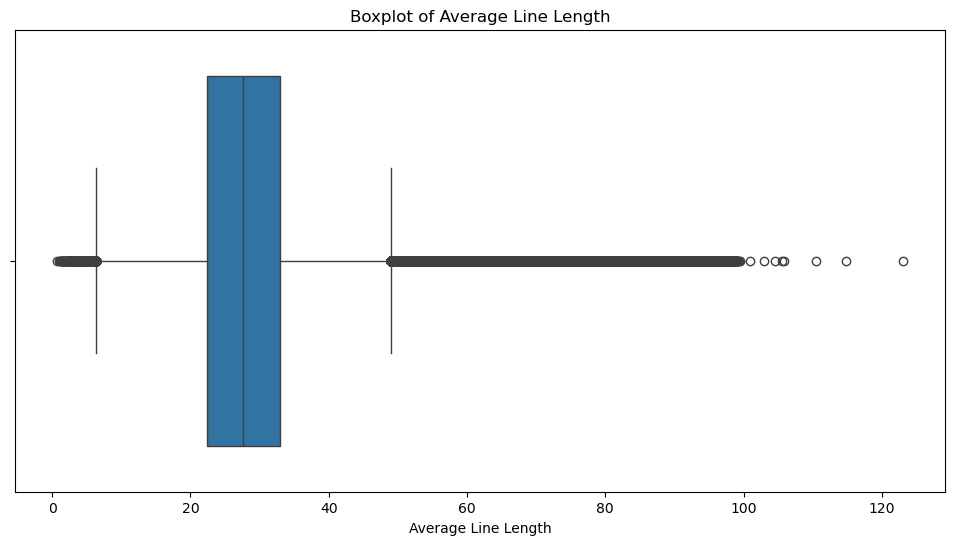

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['avg_line_length'])
plt.title('Boxplot of Average Line Length')
plt.xlabel('Average Line Length')
plt.show()

In [15]:
Q1 = df['avg_line_length'].quantile(0.25)
Q3 = df['avg_line_length'].quantile(0.75)
IQR = Q3 - Q1


In [16]:
outliers = df[(df['avg_line_length'] < (Q1 - 1.5 * IQR)) | (df['avg_line_length'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 47508


In [17]:
outliers['avg_line_length'].describe()

count    47508.000000
mean        57.765783
std         13.339976
min          0.717687
25%         51.198068
50%         55.139672
75%         63.389311
max        123.000000
Name: avg_line_length, dtype: float64

In [18]:
df.drop(outliers.index, inplace=True)

In [19]:
df['avg_line_length'].describe()

count    2.452492e+06
mean     2.757121e+01
std      7.538698e+00
min      6.347826e+00
25%      2.223684e+01
50%      2.738279e+01
75%      3.264286e+01
max      4.899232e+01
Name: avg_line_length, dtype: float64

In [20]:
import numpy as np

np.percentile(df['avg_line_length'], 80)

33.96666666666667

In [21]:
df['line_count'] = df['content'].apply(lambda x: len(x.split('\n')))
df['line_count'].describe()

count    2.452492e+06
mean     2.384202e+02
std      7.018846e+02
min      1.000000e+00
25%      4.500000e+01
50%      9.800000e+01
75%      2.230000e+02
max      7.964100e+04
Name: line_count, dtype: float64

In [22]:
count_range_dict = {
    "0-100": 0,
    "101-200": 0,
    "201-300": 0,
    "301-400": 0,
    "401-500": 0,
    "501-600": 0,
    "601-700": 0,
    "701-800": 0,
    "801-900": 0,
    "901-1000": 0,
    "1000+": 0
}

for count in df['line_count']:
    if count <= 100:
        count_range_dict["0-100"] += 1
    elif count <= 200:
        count_range_dict["101-200"] += 1
    elif count <= 300:
        count_range_dict["201-300"] += 1
    elif count <= 400:
        count_range_dict["301-400"] += 1
    elif count <= 500:
        count_range_dict["401-500"] += 1
    elif count <= 600:
        count_range_dict["501-600"] += 1
    elif count <= 700:
        count_range_dict["601-700"] += 1
    elif count <= 800:
        count_range_dict["701-800"] += 1
    elif count <= 900:
        count_range_dict["801-900"] += 1
    elif count <= 1000:
        count_range_dict["901-1000"] += 1
    else:
        count_range_dict["1000+"] += 1

In [23]:
for key, value in count_range_dict.items():
    print(f"Number of examples with line count in range {key}: {value}")

Number of examples with line count in range 0-100: 1250980
Number of examples with line count in range 101-200: 521910
Number of examples with line count in range 201-300: 232842
Number of examples with line count in range 301-400: 128321
Number of examples with line count in range 401-500: 78688
Number of examples with line count in range 501-600: 52171
Number of examples with line count in range 601-700: 36269
Number of examples with line count in range 701-800: 26549
Number of examples with line count in range 801-900: 20060
Number of examples with line count in range 901-1000: 15775
Number of examples with line count in range 1000+: 88927


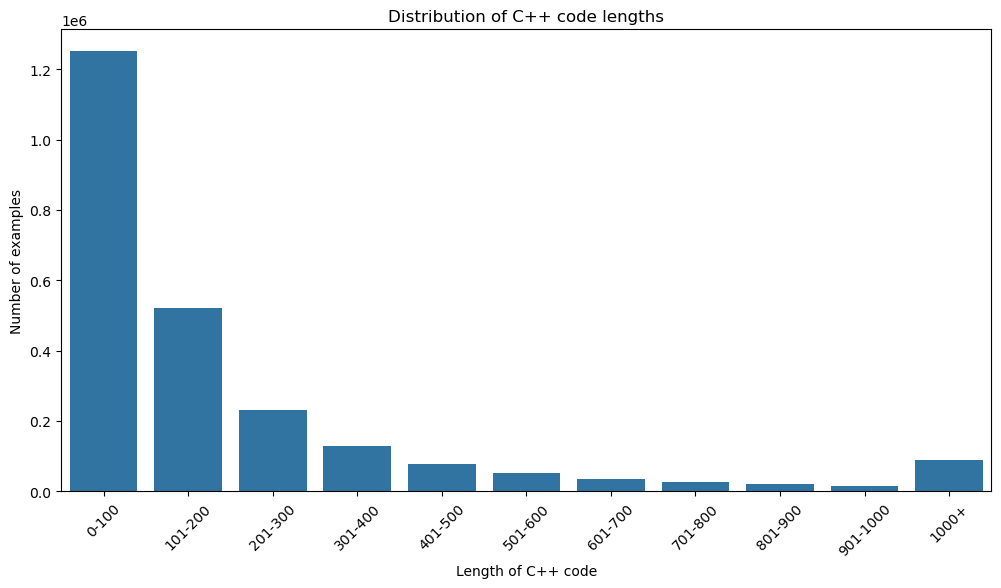

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12, 6))
sns.barplot(x=list(count_range_dict.keys()), y=list(count_range_dict.values()))
plt.title("Distribution of C++ code lengths")
plt.xlabel("Length of C++ code")
plt.ylabel("Number of examples")
plt.xticks(rotation=45)
plt.show()

In [25]:
df_line = pd.DataFrame(list(count_range_dict.items()), columns=["Length", "Count"])
df_line["Cumulative Count"] = df_line["Count"].cumsum()
df_line["Percentage"] = df_line["Count"] / df_line["Count"].sum() * 100
df_line["Cumulative Percentage"] = df_line["Percentage"].cumsum()
df_line.head(11)

,Length,Count,Cumulative Count,Percentage,Cumulative Percentage
0,0-100,1250980,1250980,51.008525,51.008525
1,101-200,521910,1772890,21.280803,72.289329
2,201-300,232842,2005732,9.494098,81.783427
3,301-400,128321,2134053,5.232270,87.015697
4,401-500,78688,2212741,3.208492,90.224188
5,501-600,52171,2264912,2.127265,92.351453
6,601-700,36269,2301181,1.478863,93.830316
7,701-800,26549,2327730,1.082532,94.912848
8,801-900,20060,2347790,0.817944,95.730791
9,901-1000,15775,2363565,0.643223,96.374015


In [26]:
df.columns

Index(['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id',
       'content', 'avg_line_length', 'line_count'],
      dtype='object')

In [27]:
df_filtered = df.drop(columns=['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id'], axis=1)
df_filtered.head()

,content,avg_line_length,line_count
0,"/**\n * Copyright (c) Facebook, Inc. and its a...",22.730000,100
1,/* Copyright 2021 The TensorFlow Authors. All ...,40.199248,266
2,/* Copyright 2020 The TensorFlow Authors. All ...,38.486239,109
3,/* Copyright 2020 The TensorFlow Authors. All ...,41.911565,147
4,/* Copyright 2021 The TensorFlow Authors. All ...,42.840336,119


In [28]:
df_filtered.shape

(2452492, 3)

In [29]:
df_filtered = df_filtered[df_filtered['line_count'] <= 500]
df_filtered.shape

(2212741, 3)

In [30]:
df_filtered = df_filtered[df_filtered['avg_line_length'] <= 34]
df_filtered.shape

(1804627, 3)

In [31]:
df_filtered.head()

,content,avg_line_length,line_count
0,"/**\n * Copyright (c) Facebook, Inc. and its a...",22.730000,100
5,/* Copyright 2020 The TensorFlow Authors. All ...,30.738636,88
16,<reponame>EricRemmerswaal/tensorflow\n/* Copyr...,30.736559,186
19,<filename>tensorflow/c/tf_shape.cc<gh_stars>10...,30.146341,41
21,/* Copyright 2020 The TensorFlow Authors. All ...,33.913333,300


In [32]:
print(df[["avg_line_length", "line_count"]].describe())
print()
print(df_filtered.describe())

       avg_line_length    line_count
count     2.452492e+06  2.452492e+06
mean      2.757121e+01  2.384202e+02
std       7.538698e+00  7.018846e+02
min       6.347826e+00  1.000000e+00
25%       2.223684e+01  4.500000e+01
50%       2.738279e+01  9.800000e+01
75%       3.264286e+01  2.230000e+02
max       4.899232e+01  7.964100e+04

       avg_line_length    line_count
count     1.804627e+06  1.804627e+06
mean      2.462387e+01  1.139572e+02
std       5.636753e+00  1.062110e+02
min       6.347826e+00  1.000000e+00
25%       2.066667e+01  3.800000e+01
50%       2.512500e+01  7.600000e+01
75%       2.915000e+01  1.550000e+02
max       3.400000e+01  5.000000e+02


In [33]:
data_dict_cpp = {}

for i, example in enumerate(df_filtered["content"]):
    data_dict_cpp[f"cpp_{i}"] = example

In [34]:
assert len(data_dict_cpp) == len(df_filtered), "Data dictionary length does not match the number of examples in the dataset."

In [35]:
for i, (k,v) in enumerate(data_dict_cpp.items()):
    if i < 5:
        print(f"Example {k}:")
        print(v)
        print("\n")
    else:
        break

Example cpp_0:
/**
 * Copyright (c) Facebook, Inc. and its affiliates.
 *
 * This source code is licensed under the MIT license found in the
 * LICENSE file in the root directory of this source tree.
 */

#include "thread-local.h"

#ifdef __linux__
#include <link.h>
#include <asm/prctl.h>
#include <sys/prctl.h>
extern "C" {
extern int arch_prctl(int, unsigned long*);
}
#endif //__linux__

namespace HPHP {

#ifdef USE_GCC_FAST_TLS

void ThreadLocalManager::OnThreadExit(void* p) {
  auto list = getList(p);
  p = list->head;
  delete list;
  while (p != nullptr) {
    auto* pNode = static_cast<ThreadLocalNode<void>*>(p);
    if (pNode->m_on_thread_exit_fn) {
      pNode->m_on_thread_exit_fn(p);
    }
    p = pNode->m_next;
  }
}

void ThreadLocalManager::PushTop(void* nodePtr, size_t nodeSize) {
  auto& node = *static_cast<ThreadLocalNode<void>*>(nodePtr);
  auto key = GetManager().m_key;
  auto list = getList(pthread_getspecific(key));
  if (UNLIKELY(!list)) {
    ThreadLocalSetValue(key

In [36]:
import json

with open('cpp_train.json', 'w') as f:
    json.dump(data_dict_cpp, f)
    print("Saved to 'cpp_train.json'")

Saved to 'cpp_train.json'
